# Analysis of Student Attrition rate in Clearwater State University

To begin with the analysis we need to read the data and necessary packages, after viewing the data we'll proceed with understanding the data and try to infer the insights from it. Secondly, we'll try to predict the chances of a student leaving early with the help of a predictive model.With the help of the model we can try to come up with the preventive measure and understand deeply the reason for a student leaving.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.options.display.max_columns = None
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel('Student Applications & Performance.xlsx')

In [3]:
#viewing the dataset
data.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,CORE_COURSE_NAME_1_F,CORE_COURSE_GRADE_1_F,CORE_COURSE_NAME_2_F,CORE_COURSE_GRADE_2_F,CORE_COURSE_NAME_3_F,CORE_COURSE_GRADE_3_F,CORE_COURSE_NAME_4_F,CORE_COURSE_GRADE_4_F,CORE_COURSE_NAME_5_F,CORE_COURSE_GRADE_5_F,CORE_COURSE_NAME_6_F,CORE_COURSE_GRADE_6_F,SECOND_TERM,CORE_COURSE_NAME_1_S,CORE_COURSE_GRADE_1_S,CORE_COURSE_NAME_2_S,CORE_COURSE_GRADE_2_S,CORE_COURSE_NAME_3_S,CORE_COURSE_GRADE_3_S,CORE_COURSE_NAME_4_S,CORE_COURSE_GRADE_4_S,CORE_COURSE_NAME_5_S,CORE_COURSE_GRADE_5_S,CORE_COURSE_NAME_6_S,CORE_COURSE_GRADE_6_S,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,HIGH_SCHL_NAME,FATHER_HI_EDU_CD,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_CD,MOTHER_HI_EDU_DESC,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,1150.0,200708,ANTH 1105,A,ARTH 1100,A,ENGL 1102,A,PSYC 1101,A,NaN,NaN,NaN,NaN,200802,CHEM 1151,A,CHEM 1151L,A,COMM 1110,A,ITDS 2749,A,NaN,NaN,NaN,NaN,On Campus,0,150.0,4.00,SCHOOL 50,NaN,No Information,NaN,No Information,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,1190.0,200808,ANTH 1105,A,GERM 1002,A,ITDS 2735,A,MATH 1125,A,THEA 1100,A,POLS 1101,A,200902,ECON 2105,A,ENGL 1102,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Off Campus,1,69.0,2.89,SCHOOL 389,3.0,College/Beyond,3.0,College/Beyond,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,1030.0,201008,ANTH 1105,A,ENGL 1101,A,HIST 2111,A,MATH 1111,A,SOCI 1101,A,NaN,NaN,201102,ENGL 1102,A,ENVS 1105,A,MUSC 1100,A,NaN,NaN,NaN,NaN,NaN,NaN,On Campus,1,150.0,3.39,SCHOOL 82,2.0,High School,4.0,Other/Unknown,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,1220.0,200708,ANTH 1107,A,COMM 1110,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200802,ENGL 1102,A,HIST 2112,A,LEAD 1705,A,MUSC 1100,A,NaN,NaN,NaN,NaN,On Campus,1,150.0,2.93,SCHOOL 180,3.0,College/Beyond,3.0,College/Beyond,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,NaN,1200.0,1190.0,200808,ANTH 1107,A,ARTH 1100,A,CPSC 1105,A,MATH 1111,A,NaN,NaN,NaN,NaN,200902,COMM 1110,A,ENGL 1101,A,HIST 2111,A,PSYC 1101,A,NaN,NaN,NaN,NaN,Off Campus,1,69.0,3.86,SCHOOL 2,3.0,College/Beyond,2.0,High School,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0


In [4]:
data.shape[0]

3400

In [5]:
data.tail()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,CORE_COURSE_NAME_1_F,CORE_COURSE_GRADE_1_F,CORE_COURSE_NAME_2_F,CORE_COURSE_GRADE_2_F,CORE_COURSE_NAME_3_F,CORE_COURSE_GRADE_3_F,CORE_COURSE_NAME_4_F,CORE_COURSE_GRADE_4_F,CORE_COURSE_NAME_5_F,CORE_COURSE_GRADE_5_F,CORE_COURSE_NAME_6_F,CORE_COURSE_GRADE_6_F,SECOND_TERM,CORE_COURSE_NAME_1_S,CORE_COURSE_GRADE_1_S,CORE_COURSE_NAME_2_S,CORE_COURSE_GRADE_2_S,CORE_COURSE_NAME_3_S,CORE_COURSE_GRADE_3_S,CORE_COURSE_NAME_4_S,CORE_COURSE_GRADE_4_S,CORE_COURSE_NAME_5_S,CORE_COURSE_GRADE_5_S,CORE_COURSE_NAME_6_S,CORE_COURSE_GRADE_6_S,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,HIGH_SCHL_NAME,FATHER_HI_EDU_CD,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_CD,MOTHER_HI_EDU_DESC,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
3395,7948112,18,F,BGD 4,N,N,Music Performance,N,NaN,800.0,790.0,200808,COMM 1110,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Off Campus,0,871.0,3.93,SCHOOL 414,NaN,No Information,NaN,No Information,B,Bachelors,18,18,16.0,13.0,0,0,0,0.0
3396,8023055,18,F,BGD 1,Y,N,Biology,N,20.0,NaN,950.0,200708,POLS 1101,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200802,POLS 1101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Off Campus,0,69.0,2.69,SCHOOL 11,NaN,No Information,NaN,No Information,B,Bachelors,13,9,NaN,NaN,0,0,0,0.0
3397,7926915,18,F,BGD 4,Y,N,Biology,N,NaN,1020.0,1030.0,200808,ENGL 1101,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,On Campus,0,90.0,2.76,SCHOOL 72,4.0,Other/Unknown,2.0,High School,B,Bachelors,14,6,NaN,NaN,0,945840,1288980,0.0
3398,7877332,18,F,BGD 3,Y,N,Joint Enrollment - Accel,N,21.0,NaN,990.0,201008,PSYC 1101,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Off Campus,1,0.0,3.56,SCHOOL 477,2.0,High School,3.0,College/Beyond,B,Bachelors,12,9,NaN,NaN,0,269100,0,-231720.0
3399,7928405,18,M,BGD 2,Y,N,Art,Creative Writing,NaN,890.0,870.0,201008,HIST 2111,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Off Campus,0,69.0,2.63,SCHOOL 11,3.0,College/Beyond,3.0,College/Beyond,B,Bachelors,12,9,13.0,6.0,0,0,0,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 56 columns):
STUDENT IDENTIFIER          3400 non-null int64
STDNT_AGE                   3400 non-null int64
STDNT_GENDER                3400 non-null object
STDNT_BACKGROUND            3400 non-null object
IN_STATE_FLAG               3400 non-null object
INTERNATIONAL_STS           3400 non-null object
STDNT_MAJOR                 3400 non-null object
STDNT_MINOR                 3400 non-null object
STDNT_TEST_ENTRANCE1        1106 non-null float64
STDNT_TEST_ENTRANCE2        2492 non-null float64
STDNT_TEST_ENTRANCE_COMB    2882 non-null float64
FIRST_TERM                  3400 non-null int64
CORE_COURSE_NAME_1_F        3400 non-null object
CORE_COURSE_GRADE_1_F       3400 non-null object
CORE_COURSE_NAME_2_F        3301 non-null object
CORE_COURSE_GRADE_2_F       3301 non-null object
CORE_COURSE_NAME_3_F        2835 non-null object
CORE_COURSE_GRADE_3_F       2835 non-null object
CORE_COURSE

In [7]:
data.describe()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,SECOND_TERM,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_CD,MOTHER_HI_EDU_CD,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
count,3.400000e+03,3400.000000,1106.000000,2492.000000,2882.000000,3400.000000,3400.000000,3400.000000,3375.000000,3347.000000,2968.000000,2911.000000,3400.000000,3400.000000,3194.000000,3191.000000,3.400000e+03,3.400000e+03,3.400000e+03,3.400000e+03
mean,7.897155e+06,17.994118,20.660036,965.092295,997.758501,200777.000000,200871.000000,0.787353,99.825185,3.202738,2.560647,2.571281,13.985882,12.205000,14.285848,12.511125,3.034025e+05,5.515335e+05,3.446899e+05,7.222052e+04
std,8.083421e+04,0.552052,3.234734,209.088633,156.268221,170.001298,170.001298,0.409240,235.196984,0.455337,0.681273,0.611729,1.554286,2.986294,2.104387,3.470492,4.836255e+05,6.064403e+05,7.871878e+05,2.795679e+05
min,7.755837e+06,16.000000,8.000000,350.000000,530.000000,200508.000000,200602.000000,0.000000,0.000000,0.000000,1.000000,1.000000,9.000000,0.000000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.212072e+06
25%,7.827039e+06,18.000000,18.000000,900.000000,910.000000,200608.000000,200702.000000,1.000000,69.000000,2.870000,2.000000,2.000000,13.000000,11.000000,13.000000,11.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.899052e+06,18.000000,20.000000,990.000000,990.000000,200808.000000,200902.000000,1.000000,69.000000,3.200000,3.000000,3.000000,14.000000,13.000000,14.000000,13.000000,0.000000e+00,1.505400e+05,0.000000e+00,0.000000e+00
75%,7.964008e+06,18.000000,22.000000,1100.000000,1110.000000,200908.000000,201002.000000,1.000000,138.000000,3.560000,3.000000,3.000000,15.000000,15.000000,16.000000,15.000000,5.995800e+05,1.192815e+06,3.241800e+05,1.876155e+05
max,8.037098e+06,26.000000,32.000000,1490.000000,1510.000000,201008.000000,201102.000000,1.000000,5932.000000,4.000000,4.000000,4.000000,21.000000,21.000000,23.000000,23.000000,2.124900e+06,2.124900e+06,5.999940e+06,1.632660e+06


# Missing Values treatement

In [8]:
data.isna().sum() /data.shape[0] *100

STUDENT IDENTIFIER           0.000000
STDNT_AGE                    0.000000
STDNT_GENDER                 0.000000
STDNT_BACKGROUND             0.000000
IN_STATE_FLAG                0.000000
INTERNATIONAL_STS            0.000000
STDNT_MAJOR                  0.000000
STDNT_MINOR                  0.000000
STDNT_TEST_ENTRANCE1        67.470588
STDNT_TEST_ENTRANCE2        26.705882
STDNT_TEST_ENTRANCE_COMB    15.235294
FIRST_TERM                   0.000000
CORE_COURSE_NAME_1_F         0.000000
CORE_COURSE_GRADE_1_F        0.000000
CORE_COURSE_NAME_2_F         2.911765
CORE_COURSE_GRADE_2_F        2.911765
CORE_COURSE_NAME_3_F        16.617647
CORE_COURSE_GRADE_3_F       16.617647
CORE_COURSE_NAME_4_F        46.970588
CORE_COURSE_GRADE_4_F       46.970588
CORE_COURSE_NAME_5_F        81.029412
CORE_COURSE_GRADE_5_F       81.029412
CORE_COURSE_NAME_6_F        96.235294
CORE_COURSE_GRADE_6_F       96.235294
SECOND_TERM                  0.000000
CORE_COURSE_NAME_1_S         4.617647
CORE_COURSE_

In [9]:
data.STDNT_TEST_ENTRANCE_COMB.isna().sum() /data.shape[0]*100

15.235294117647058

In [10]:
def fillna (x):
    
    if pd.isna(x['STDNT_TEST_ENTRANCE_COMB']):
        if pd.notna(x['STDNT_TEST_ENTRANCE2']):
            x['STDNT_TEST_ENTRANCE_COMB']=x['STDNT_TEST_ENTRANCE2']
    return x        

In [11]:
data=data.apply(fillna,axis=1)

In [12]:
data.STDNT_TEST_ENTRANCE_COMB.isna().sum()/data.shape[0] *100

11.794117647058822

In [13]:
data['STDNT_TEST_ENTRANCE_COMB']=data['STDNT_TEST_ENTRANCE_COMB'].fillna(0)

In [14]:
#Cross checking for nan values in STDNT_TEST_ENTRANCE_COMB
data.STDNT_TEST_ENTRANCE_COMB.isna().any()

False

In [15]:
data.CORE_COURSE_NAME_2_F.unique()

array(['ARTH 1100', 'GERM 1002', 'ENGL 1101', 'COMM 1110', 'HIST 2112',
       'CHEM 1211', 'ENGL 1102', 'ECON 2105', 'ITDS 2735', 'CHEM 1151L',
       'CHEM 1211L', 'MATH 1111', 'FREN 1002', 'ENGL 2111', 'ENVS 1105',
       'HIST 1111', 'HIST 2111', 'CHEM 1151', 'BIOL 1215K', 'CPSC 1301L',
       'MATH 1113', 'SOCI 1101', 'SPAN 1002', 'MATH 1131', 'MUSC 1100',
       'LEAD 1705', 'HIST 1112', 'PSYC 1101', 'THEA 1100', 'POLS 1101',
       'CPSC 1105', 'CPSC 1301', 'ITDS 1145', 'FREN 2001', 'GEOL 1121',
       'ARTH 1100I', 'COMM 1110I', 'ECON 2106', 'ANTH 1105', 'COMM 1110H',
       'ITDS 1155', 'POLS 1101H', 'MATH 1125', 'HIST 1112I', 'SPAN 1001',
       'BIOL 1125', 'ASTR 1105', 'PHYS 2311', 'GEOG 1101I', nan,
       'ENGL 1101I', 'FREN 1001', 'STAT 1127', 'MATH 2115', 'ITDS 1156',
       'POLS 2401', 'MATH 1101', 'GEOL 1121L', 'GEOL 1110', 'PHYS 1125',
       'JAPN 1001', 'ENGL 2136', 'ITDS 2726', 'ITDS 2749', 'ANTH 1105I',
       'ITDS 1146', 'MATH 1132', 'ANTH 1107', 'ENVS 1105I',

In [16]:
#Instead of nan values inducing a value called new subject
data['CORE_COURSE_NAME_2_F']=data['CORE_COURSE_NAME_2_F'].fillna('New Sub')

In [17]:
print(data.CORE_COURSE_GRADE_2_F.unique())
print(data.CORE_COURSE_GRADE_2_F.mode())

['A' 'B' 'C' 'D' 'F' nan 'NOT REP' 'INCOMPL']
0    B
dtype: object


In [18]:
data['CORE_COURSE_GRADE_2_F']=data['CORE_COURSE_GRADE_2_F'].fillna('C')

In [19]:
data.CORE_COURSE_NAME_1_S.unique()

array(['CHEM 1151', 'ECON 2105', 'ENGL 1102', 'COMM 1110', 'BIOL 1215K',
       'ECON 2106', 'SPAN 1001', 'MATH 1101', 'ARTH 1100', 'BIOL 1225K',
       'HIST 2112', 'COMM 1110H', 'CPSC 1105', 'HIST 2111', 'ITDS 2726',
       'MATH 1111', 'GEOG 1101I', 'ANTH 1107', 'ENGL 1101', 'ASTR 1105',
       'COMM 1110I', 'ANTH 1105I', 'BIOL 1125', 'CPSC 1301', 'ANTH 1105',
       'STAT 1127', 'CHEM 1211', 'MUSC 1100', 'FREN 1001', 'SPAN 1002',
       'ENGL 2111', 'GEOL 1121', 'ITDS 1145', 'ENVS 1105', 'GEOL 1121L',
       'POLS 1101', 'PSYC 1101', 'THEA 1100', 'MATH 1131', 'ENGL 2136',
       'MATH 1113', 'FREN 1002', 'CHEM 1151L', 'HIST 1111', 'ITDS 1156',
       'GEOL 1110', 'ITDS 2735', 'MATH 1132', 'POLS 2401', 'PHYS 1125',
       'SOCI 1101', 'CHEM 1211L', 'MATH 2125', 'FREN 2001', 'HIST 1112',
       'HIST 1112I', 'ITDS 1155', 'FREN 2002', 'ENGL 1101I', 'MATH 1125',
       'MATH 2115', 'CPSC 1301L', 'ITDS 2749', 'ITDS 2727', 'POLS 1101H',
       'ITDS 2748', nan], dtype=object)

In [20]:
data['CORE_COURSE_NAME_1_S']=data['CORE_COURSE_NAME_1_S'].fillna('New Sub')

In [21]:
data['CORE_COURSE_GRADE_1_S'].unique()

array(['A', 'B', 'C', 'D', 'F', 'NOT REP', 'INCOMPL', 'Unknown', nan],
      dtype=object)

In [22]:
data['CORE_COURSE_GRADE_1_S']=data['CORE_COURSE_GRADE_1_S'].str.replace('Unknown','C')

In [23]:
data['CORE_COURSE_GRADE_1_S']=data['CORE_COURSE_GRADE_1_S'].fillna('C')

In [24]:
data['CORE_COURSE_NAME_2_S']=data['CORE_COURSE_NAME_2_S'].fillna('New Sub')

In [25]:
data['CORE_COURSE_GRADE_2_S']=data['CORE_COURSE_GRADE_2_S'].fillna('C')

In [26]:
data['DISTANCE_FROM_HOME']=data['DISTANCE_FROM_HOME'].fillna(data['DISTANCE_FROM_HOME'].median())

In [27]:
data['HIGH_SCHL_GPA']=data['HIGH_SCHL_GPA'].fillna(data['HIGH_SCHL_GPA'].median())

In [28]:
data['HIGH_SCHL_NAME']=data['HIGH_SCHL_NAME'].fillna(data['HIGH_SCHL_NAME'].mode)

In [29]:
data['FATHER_HI_EDU_CD'].unique()

array([nan,  3.,  2.,  1.,  4.])

In [30]:
data[data['FATHER_HI_EDU_DESC']=='Other/Unknown']

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,CORE_COURSE_NAME_1_F,CORE_COURSE_GRADE_1_F,CORE_COURSE_NAME_2_F,CORE_COURSE_GRADE_2_F,CORE_COURSE_NAME_3_F,CORE_COURSE_GRADE_3_F,CORE_COURSE_NAME_4_F,CORE_COURSE_GRADE_4_F,CORE_COURSE_NAME_5_F,CORE_COURSE_GRADE_5_F,CORE_COURSE_NAME_6_F,CORE_COURSE_GRADE_6_F,SECOND_TERM,CORE_COURSE_NAME_1_S,CORE_COURSE_GRADE_1_S,CORE_COURSE_NAME_2_S,CORE_COURSE_GRADE_2_S,CORE_COURSE_NAME_3_S,CORE_COURSE_GRADE_3_S,CORE_COURSE_NAME_4_S,CORE_COURSE_GRADE_4_S,CORE_COURSE_NAME_5_S,CORE_COURSE_GRADE_5_S,CORE_COURSE_NAME_6_S,CORE_COURSE_GRADE_6_S,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,HIGH_SCHL_NAME,FATHER_HI_EDU_CD,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_CD,MOTHER_HI_EDU_DESC,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
50,8012125,18,F,BGD 1,Y,N,Accounting,N,NaN,1120.0,1110.0,200708,COMM 1110,A,ENGL 1101,A,ITDS 2735,A,MATH 1113,A,NaN,NaN,NaN,NaN,200802,ECON 2105,A,ENGL 1102,A,THEA 1100,A,POLS 1101,A,NaN,NaN,NaN,NaN,Off Campus,1,0.0,3.9300,SCHOOL 70,4.0,Other/Unknown,2.0,High School,B,Bachelors,12,12,15.0,15.0,1285860,1285860,0,655380.0
61,7767164,17,F,BGD 1,Y,N,Pre-Nursing,N,25.0,1200.0,1150.0,201008,CPSC 1105,A,CHEM 1151,A,CHEM 1151L,A,PSYC 1101,A,NaN,NaN,NaN,NaN,201102,ENGL 1102,A,MATH 1101,A,SOCI 1101,A,NaN,NaN,NaN,NaN,NaN,NaN,Off Campus,1,69.0,4.0000,SCHOOL 25,4.0,Other/Unknown,2.0,High School,B,Bachelors,12,12,13.0,13.0,0,0,0,0.0
62,7811151,18,F,BGD 1,Y,N,Undeclared,N,NaN,NaN,0.0,201008,CPSC 1105,A,BIOL 1215K,A,HIST 2112,A,PSYC 1101,A,THEA 1100,A,NaN,NaN,201102,ENGL 1102,A,GEOG 1101I,A,ITDS 1145,A,MATH 1111,A,NaN,NaN,NaN,NaN,Off Campus,1,0.0,3.9000,SCHOOL 2,4.0,Other/Unknown,3.0,College/Beyond,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
74,8002726,18,F,BGD 1,Y,N,Management,N,25.0,1190.0,1150.0,200508,ENGL 1101,A,ITDS 2735,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200602,ARTH 1100,A,ENGL 1102,A,ITDS 1156,A,MATH 1111,A,NaN,NaN,NaN,NaN,On Campus,1,69.0,3.3300,SCHOOL 9,4.0,Other/Unknown,2.0,High School,B,Bachelors,12,12,13.0,13.0,0,0,0,0.0
110,7846144,18,F,BGD 1,Y,N,Theatre Arts,N,NaN,1160.0,1150.0,201008,MATH 1101,A,LEAD 1705,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201102,ENGL 1102,A,ITDS 1145,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,On Campus,1,138.0,3.9200,SCHOOL 319,4.0,Other/Unknown,4.0,Other/Unknown,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
116,7808603,18,F,BGD 3,Y,N,Pre-Nursing,N,20.0,920.0,950.0,200808,CHEM 1151L,B,CHEM 1151,A,ENGL 1101,A,MATH 1101,A,MUSC 1100,A,NaN,NaN,200902,ENGL 1102,A,ITDS 1146,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Off Campus,1,0.0,3.7100,SCHOOL 14,4.0,Other/Unknown,2.0,High School,B,Bachelors,13,13,13.0,13.0,1333200,1355760,22560,572700.0
129,8011493,18,M,BGD 1,Y,N,History and Secondary Ed,N,NaN,1160.0,1150.0,200508,ENGL 1101,B,COMM 1110,A,MATH 1101,A,SPAN 1002,A,NaN,NaN,NaN,NaN,200602,ENGL 1102,A,MUSC 1100,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Off Campus,1,0.0,3.7300,SCHOOL 130,4.0,Other/Unknown,2.0,High School,B,Bachelors,12,12,12.0,12.0,0,0,0,0.0
135,7852642,19,F,BGD 3,Y,N,Nursing,N,NaN,1000.0,990.0,200608,ENGL 1101,B,CHEM 1151,A,CHEM 1151L,A,HIST 2112,A,THEA 1100,A,NaN,NaN,200702,ECON 2106,A,ENGL 1102,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Off Campus,1,0.0,3.7100,SCHOOL 13,4.0,Other/Unknown,1.0,Middle School/Junior High,B,Bachelors,13,13,12.0,12.0,1187280,1187280,0,358620.0
159,7756911,18,F,BGD 4,Y,N,Health Science,N,NaN,570.0,590.0,200808,ITDS 1155,B,COMM 1110,A,ENGL 1101,A,MATH 1111,A,NaN,NaN,NaN,NaN,200902,ENGL 1102,A,HIST 2111,A,ITDS 2735,A,STAT 1127,A,NaN,NaN,NaN,NaN,Off Campus,1,69.0,3.6000,SCHOOL 2,4.0,Other/Unknown,3.0,College/Beyond,B,Bachelors,14,14,13.0,13.0,969180,1255740,286560,621600.0
187,7879460,18,F,BGD 1,Y,N,Nursing,Spanish,NaN,NaN,0.0,200608,CHEM 1151,B,ENGL 1101,B,MATH 1101,B,CHEM 1151L,A,NaN,N

In [31]:
data.FATHER_HI_EDU_DESC.unique()

array(['No Information', 'College/Beyond', 'High School',
       'Middle School/Junior High', 'Other/Unknown'], dtype=object)

In [32]:
data['FATHER_HI_EDU_CD']=data['FATHER_HI_EDU_CD'].fillna(0)

In [33]:
data.MOTHER_HI_EDU_CD.unique()

array([nan,  3.,  4.,  2.,  1.])

In [34]:
data.MOTHER_HI_EDU_DESC.unique()

array(['No Information', 'College/Beyond', 'Other/Unknown', 'High School',
       'Middle School/Junior High'], dtype=object)

In [35]:
data[data['MOTHER_HI_EDU_DESC']=='No Information']

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,CORE_COURSE_NAME_1_F,CORE_COURSE_GRADE_1_F,CORE_COURSE_NAME_2_F,CORE_COURSE_GRADE_2_F,CORE_COURSE_NAME_3_F,CORE_COURSE_GRADE_3_F,CORE_COURSE_NAME_4_F,CORE_COURSE_GRADE_4_F,CORE_COURSE_NAME_5_F,CORE_COURSE_GRADE_5_F,CORE_COURSE_NAME_6_F,CORE_COURSE_GRADE_6_F,SECOND_TERM,CORE_COURSE_NAME_1_S,CORE_COURSE_GRADE_1_S,CORE_COURSE_NAME_2_S,CORE_COURSE_GRADE_2_S,CORE_COURSE_NAME_3_S,CORE_COURSE_GRADE_3_S,CORE_COURSE_NAME_4_S,CORE_COURSE_GRADE_4_S,CORE_COURSE_NAME_5_S,CORE_COURSE_GRADE_5_S,CORE_COURSE_NAME_6_S,CORE_COURSE_GRADE_6_S,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,HIGH_SCHL_NAME,FATHER_HI_EDU_CD,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_CD,MOTHER_HI_EDU_DESC,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,1150.0,200708,ANTH 1105,A,ARTH 1100,A,ENGL 1102,A,PSYC 1101,A,NaN,NaN,NaN,NaN,200802,CHEM 1151,A,CHEM 1151L,A,COMM 1110,A,ITDS 2749,A,NaN,NaN,NaN,NaN,On Campus,0,150.0,4.00,SCHOOL 50,0.0,No Information,NaN,No Information,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
6,7838856,18,F,BGD 1,Y,N,Biology,N,NaN,580.0,590.0,200508,ARTH 1100,A,CHEM 1211,A,CHEM 1211L,A,ENGL 1101,A,HIST 2111,A,MATH 1113,A,200602,ENGL 1102,A,ITDS 2735,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Off Campus,1,0.0,3.93,SCHOOL 2,0.0,No Information,NaN,No Information,B,Bachelors,16,16,15.0,15.0,0,0,0,0.0
7,7960448,18,F,BGD 1,Y,N,Biology,N,NaN,750.0,740.0,200508,ARTH 1100,A,CHEM 1211,A,CHEM 1211L,A,ENGL 1101,A,NaN,NaN,NaN,NaN,200602,ENGL 1102,A,ITDS 2735,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Off Campus,1,0.0,4.00,SCHOOL 130,0.0,No Information,NaN,No Information,B,Bachelors,16,16,15.0,15.0,0,0,0,0.0
12,7915174,18,F,BGD 6,Y,N,Biology,N,NaN,1250.0,1260.0,200808,ARTH 1100,A,ENGL 1102,A,MATH 1132,A,POLS 1101,A,NaN,NaN,NaN,NaN,200902,SPAN 1001,A,STAT 1127,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Off Campus,1,69.0,3.93,SCHOOL 2,0.0,No Information,NaN,No Information,B,Bachelors,17,17,13.0,13.0,0,0,0,0.0
28,7877120,18,F,BGD 1,N,N,Early Childhood Education,N,27.0,NaN,1220.0,200608,CHEM 1211,A,CHEM 1211L,A,HIST 2112,A,POLS 1101,A,NaN,NaN,NaN,NaN,200702,ARTH 1100,A,COMM 1110H,A,ENVS 1105,A,POLS 2401,A,NaN,NaN,NaN,NaN,Off Campus,1,69.0,4.00,SCHOOL 148,0.0,No Information,NaN,No Information,B,Bachelors,13,13,16.0,16.0,0,0,0,0.0
29,7889681,18,F,BGD 1,Y,N,Biology,N,NaN,1310.0,1300.0,200608,CHEM 1211,A,CHEM 1211L,A,MATH 1113,A,THEA 1100,A,POLS 1101,A,NaN,NaN,200702,COMM 1110,A,MATH 1131,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,On Campus,1,90.0,3.81,SCHOOL 298,0.0,No Information,NaN,No Information,B,Bachelors,13,13,15.0,15.0,0,0,0,0.0
36,7799972,18,F,BGD 1,Y,N,Undeclared,N,NaN,620.0,640.0,200508,COMM 1110,A,ENGL 1101,A,HIST 2111,A,LEAD 1705,A,NaN,NaN,NaN,NaN,200602,ENGL 1102,A,MATH 1111,A,MUSC 1100,A,NaN,NaN,NaN,NaN,NaN,NaN,On Campus,0,138.0,3.60,SCHOOL 131,0.0,No Information,NaN,No Information,B,Bachelors,18,18,14.0,14.0,0,0,0,0.0
40,7979978,18,F,BGD 1,Y,N,Art,N,NaN,NaN,0.0,200508,COMM 1110,A,ENGL 1101,A,PSYC 1101,A,POLS 1101,A,NaN,NaN,NaN,NaN,200602,ITDS 2726,A,ITDS 2727,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Off Campus,1,69.0,3.58,SCHOOL 8,0.0,No Information,NaN,No Information,B,Bachelors,15,15,7.0,7.0,0,0,0,0.0
41,7888437,18,F,BGD 1,N,N,Music Performance,N,28.0,NaN,1260.0,200508,COMM 1110,A,FREN 1002,A,POLS 1101H,A,NaN,NaN,NaN,NaN,NaN,NaN,200602,ENGL 1102,A,FREN 2001,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Off Campus,1,614.0,3.90,SCHOOL 223,0.0,No Information,NaN,No Information,B,Bachelors,17,17,19.0,19.0,0,224640,0,-6000.0
42,7817369,18,F,BGD 1,Y,N,Early Childhood Education,N,NaN,620.0,640.0,200608,COMM 1110,A,ENGL 1101,A,MATH 1101,A,THEA 1100,A,POLS 1101,A,NaN,NaN,200702,ENGL 1102,A,ENVS 1105,A,ITDS 2735,A,NaN,NaN,NaN,NaN,NaN,NaN,Off 

In [36]:
data['MOTHER_HI_EDU_CD']=data['MOTHER_HI_EDU_CD'].fillna(0)

In [37]:
data[pd.isna(data['SECOND_TERM_ATTEMPT_HRS'])]

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,CORE_COURSE_NAME_1_F,CORE_COURSE_GRADE_1_F,CORE_COURSE_NAME_2_F,CORE_COURSE_GRADE_2_F,CORE_COURSE_NAME_3_F,CORE_COURSE_GRADE_3_F,CORE_COURSE_NAME_4_F,CORE_COURSE_GRADE_4_F,CORE_COURSE_NAME_5_F,CORE_COURSE_GRADE_5_F,CORE_COURSE_NAME_6_F,CORE_COURSE_GRADE_6_F,SECOND_TERM,CORE_COURSE_NAME_1_S,CORE_COURSE_GRADE_1_S,CORE_COURSE_NAME_2_S,CORE_COURSE_GRADE_2_S,CORE_COURSE_NAME_3_S,CORE_COURSE_GRADE_3_S,CORE_COURSE_NAME_4_S,CORE_COURSE_GRADE_4_S,CORE_COURSE_NAME_5_S,CORE_COURSE_GRADE_5_S,CORE_COURSE_NAME_6_S,CORE_COURSE_GRADE_6_S,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,HIGH_SCHL_NAME,FATHER_HI_EDU_CD,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_CD,MOTHER_HI_EDU_DESC,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
2394,7876160,19,M,BGD 3,Y,N,Psychology,N,NaN,970.0,950.0,200908,POLS 1101,F,ENGL 1101,C,ARTH 1100,B,NaN,NaN,NaN,NaN,NaN,NaN,201002,ECON 2105,D,COMM 1110,C,PSYC 1101,C,ENGL 1102,B,NaN,NaN,NaN,NaN,On Campus,0,150.0,2.8400,SCHOOL 444,2.0,High School,3.0,College/Beyond,B,Bachelors,12,9,NaN,NaN,1306020,1306020,0,954060.0
3168,7916878,18,F,BGD 1,Y,N,Undeclared,N,23.0,NaN,1070.0,200708,ARTH 1100,A,ENGL 1101,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200802,New Sub,C,New Sub,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Off Campus,0,69.0,3.5300,SCHOOL 46,0.0,No Information,0.0,No Information,B,Bachelors,13,13,NaN,NaN,0,326880,0,-217920.0
3170,7788853,18,F,BGD 1,Y,N,Undeclared,N,NaN,1100.0,1110.0,200908,ARTH 1100,A,ENGL 1101,A,HIST 2111,A,LEAD 1705,A,POLS 1101,A,NaN,NaN,201002,New Sub,C,New Sub,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Off Campus,0,0.0,3.7300,SCHOOL 130,2.0,High School,2.0,High School,B,Bachelors,17,17,NaN,NaN,0,0,0,0.0
3171,7984446,18,M,BGD 1,Y,N,History,N,NaN,520.0,530.0,201008,BIOL 1125,A,ENGL 1101,A,MATH 1101,A,MUSC 1100,A,NaN,NaN,NaN,NaN,201102,New Sub,C,New Sub,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Off Campus,0,0.0,3.7500,SCHOOL 130,3.0,College/Beyond,3.0,College/Beyond,B,Bachelors,15,15,NaN,NaN,0,0,0,0.0
3175,7927215,18,M,BGD 1,Y,N,Political Science,N,NaN,1260.0,1260.0,201008,COMM 1110,A,ENGL 1101,A,LEAD 1705,A,POLS 2401,A,NaN,NaN,NaN,NaN,201102,COMM 1110,C,New Sub,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,On Campus,0,69.0,3.6600,SCHOOL 2,3.0,College/Beyond,0.0,No Information,B,Bachelors,14,14,NaN,NaN,0,0,0,0.0
3176,7913032,18,F,BGD 1,Y,N,History and Secondary Ed,N,27.0,1240.0,1220.0,200808,CPSC 1105,A,POLS 1101,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200902,New Sub,C,New Sub,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,On Campus,0,138.0,4.0000,SCHOOL 42,3.0,College/Beyond,3.0,College/Beyond,B,Bachelors,15,15,NaN,NaN,0,0,0,0.0
3177,7989716,17,F,BGD 1,Y,N,Undeclared,N,19.0,NaN,910.0,200508,ENGL 1101,A,HIST 2111,A,ITDS 2727,A,MATH 1101,A,NaN,NaN,NaN,NaN,200602,ENGL 1101,C,New Sub,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,On Campus,0,150.0,3.5000,SCHOOL 63,2.0,High School,1.0,Middle School/Junior High,B,Bachelors,12,12,NaN,NaN,0,0,0,0.0
3179,7882322,18,F,BGD 1,Y,N,Early Childhood Education,History,NaN,980.0,990.0,200908,ENGL 1101,A,HIST 2111,A,ITDS 2726,A,ITDS 2749,A,PSYC 1101,A,NaN,NaN,201002,New Sub,C,New Sub,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,On Campus,0,138.0,2.7900,SCHOOL 452,4.0,Other/Unknown,2.0,High School,B,Bachelors,15,11,NaN,NaN,1418100,1418100,0,725100.0
3180,7829161,18,F,BGD 3,Y,N,Early Childhood Education,N,17.0,NaN,830.0,201008,ENGL 1101,A,ITDS 2749,A,SPAN 1001,A,NaN,NaN,NaN,NaN,NaN,NaN,201102,ENGL 1101,C,New Sub,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,On Campus,0,90.0,3.6000,SCHOOL 475,2.0,High School,2.0,High School,B,Bachelors,13,9,NaN,NaN,0,0,0,0.0
3182,7921581,18,F,BGD 1,Y,N,Criminal Justice,N,26.0,1230.0,1190.0,201008,ENGL 1101,A,MATH 1101,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201102,New Sub,C,New Sub,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [38]:
data['SECOND_TERM_ATTEMPT_HRS']=data['SECOND_TERM_ATTEMPT_HRS'].fillna(data['SECOND_TERM_ATTEMPT_HRS'].median())

In [39]:
data['SECOND_TERM_EARNED_HRS']=data['SECOND_TERM_EARNED_HRS'].fillna(data['SECOND_TERM_EARNED_HRS'].median())

In [40]:
data.drop(columns=['CORE_COURSE_NAME_3_F','CORE_COURSE_GRADE_3_F', 
                   'CORE_COURSE_NAME_4_F','CORE_COURSE_GRADE_4_F', 
                   'CORE_COURSE_NAME_5_F','CORE_COURSE_GRADE_5_F', 
                   'CORE_COURSE_NAME_6_F','CORE_COURSE_GRADE_6_F',
                   'CORE_COURSE_NAME_3_S','CORE_COURSE_GRADE_3_S', 
                   'CORE_COURSE_NAME_4_S','CORE_COURSE_GRADE_4_S',
                   'CORE_COURSE_NAME_5_S','CORE_COURSE_GRADE_5_S', 
                   'CORE_COURSE_NAME_6_S','CORE_COURSE_GRADE_6_S',
                  'STDNT_TEST_ENTRANCE1','STDNT_TEST_ENTRANCE2'],inplace=True)

In [41]:
data.isna().sum()

STUDENT IDENTIFIER          0
STDNT_AGE                   0
STDNT_GENDER                0
STDNT_BACKGROUND            0
IN_STATE_FLAG               0
INTERNATIONAL_STS           0
STDNT_MAJOR                 0
STDNT_MINOR                 0
STDNT_TEST_ENTRANCE_COMB    0
FIRST_TERM                  0
CORE_COURSE_NAME_1_F        0
CORE_COURSE_GRADE_1_F       0
CORE_COURSE_NAME_2_F        0
CORE_COURSE_GRADE_2_F       0
SECOND_TERM                 0
CORE_COURSE_NAME_1_S        0
CORE_COURSE_GRADE_1_S       0
CORE_COURSE_NAME_2_S        0
CORE_COURSE_GRADE_2_S       0
HOUSING_STS                 0
RETURNED_2ND_YR             0
DISTANCE_FROM_HOME          0
HIGH_SCHL_GPA               0
HIGH_SCHL_NAME              0
FATHER_HI_EDU_CD            0
FATHER_HI_EDU_DESC          0
MOTHER_HI_EDU_CD            0
MOTHER_HI_EDU_DESC          0
DEGREE_GROUP_CD             0
DEGREE_GROUP_DESC           0
FIRST_TERM_ATTEMPT_HRS      0
FIRST_TERM_EARNED_HRS       0
SECOND_TERM_ATTEMPT_HRS     0
SECOND_TER

In [42]:
data['attrition']=data['RETURNED_2ND_YR'].map(lambda x: 1 if x==0 else 0)


# 2 .EDA 

Text(0.5, 0, 'Gender')

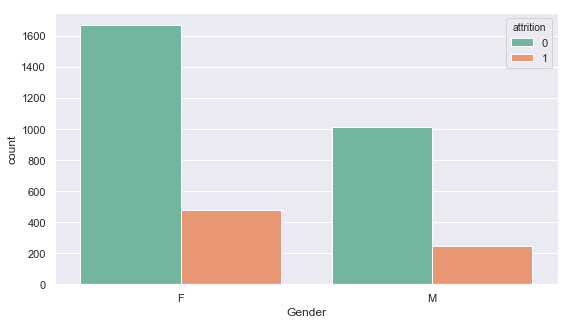

In [43]:
sns.set(style="darkgrid")
plt.figure(figsize=(9,5))
sns.countplot(data=data,hue="attrition",x="STDNT_GENDER",palette="Set2")
plt.xlabel('Gender')


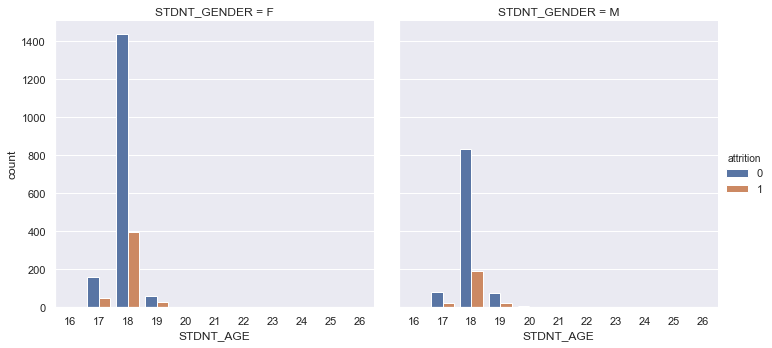

In [44]:
sns.catplot(x='STDNT_AGE',hue="attrition",col='STDNT_GENDER',kind="count",data=data,aspect=1);


In [45]:
data.groupby(['STDNT_GENDER','attrition'],as_index=False).agg({'STDNT_AGE':np.mean})

,STDNT_GENDER,attrition,STDNT_AGE
0,F,0,17.950150
1,F,1,17.981053
2,M,0,18.051383
3,M,1,18.080645


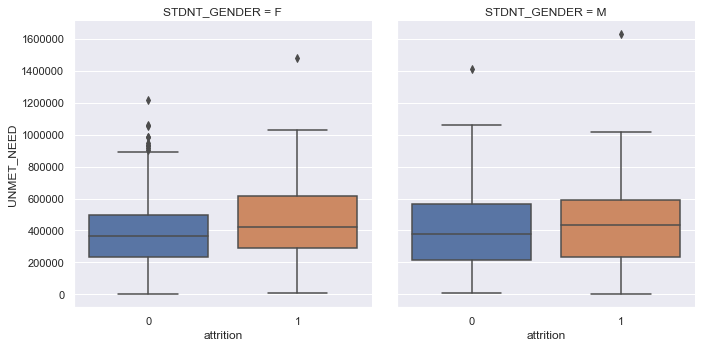

In [46]:
sns.catplot(y='UNMET_NEED',x='attrition',data=data.query("UNMET_NEED>0"),col='STDNT_GENDER',kind='box')

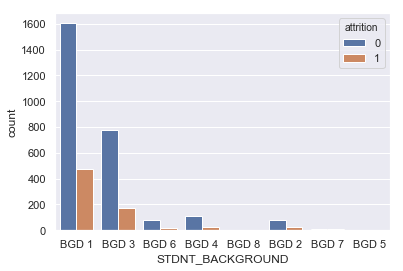

In [47]:
sns.color_palette("Set2")
sns.countplot(x="STDNT_BACKGROUND",hue="attrition",data=data)

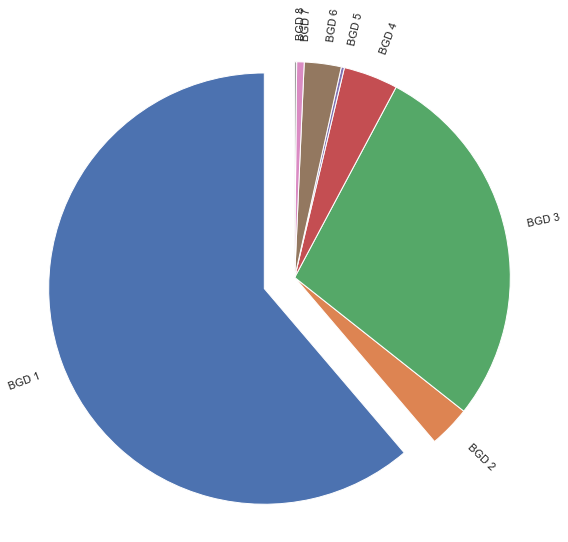

In [48]:

table=data.groupby('STDNT_BACKGROUND',as_index=False).agg({'STUDENT IDENTIFIER':np.count_nonzero}).rename(columns={'STDNT_BACKGROUND':'labels','STUDENT IDENTIFIER':'counts'})
plt.figure(figsize=(9,9))
plt.pie(table['counts'],labels=table['labels'],autopct=None,startangle=90,explode=(0.15,0,0,0,0,0,0,0),rotatelabels=True)
plt.axis('equal')

plt.show()

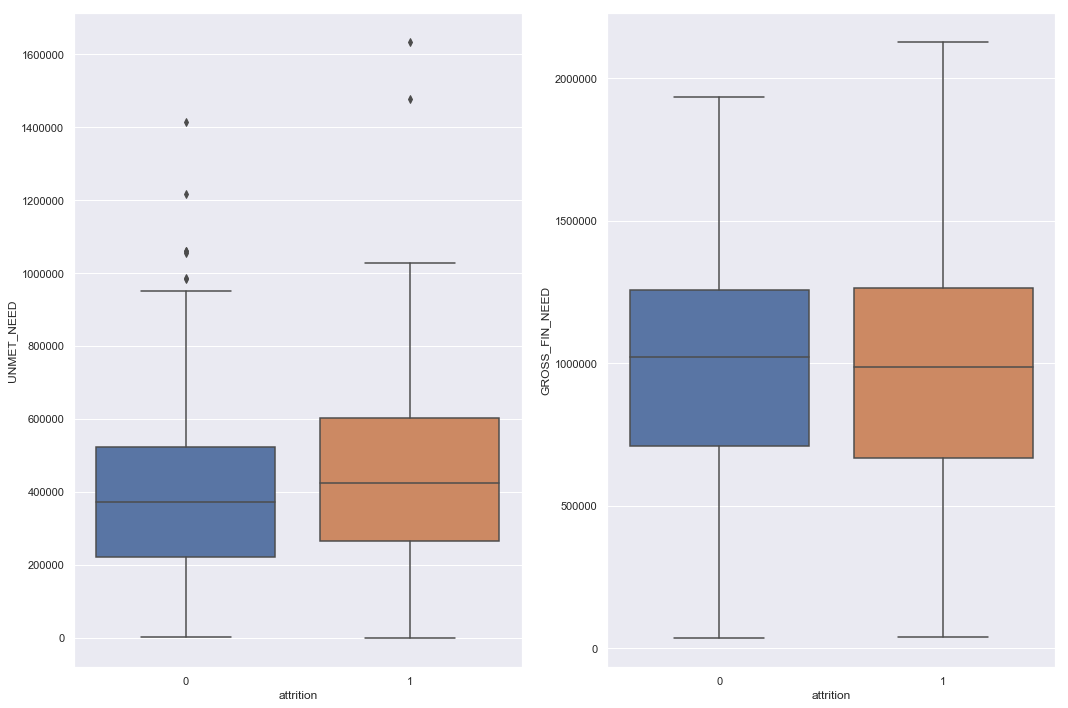

In [49]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)

sns.boxplot(x='attrition',y='UNMET_NEED',data=data.query("UNMET_NEED>0"))


plt.subplot(1,2,2)

sns.boxplot(x='attrition',y='GROSS_FIN_NEED',data=data.query("UNMET_NEED>0"))

plt.tight_layout()
plt.show()

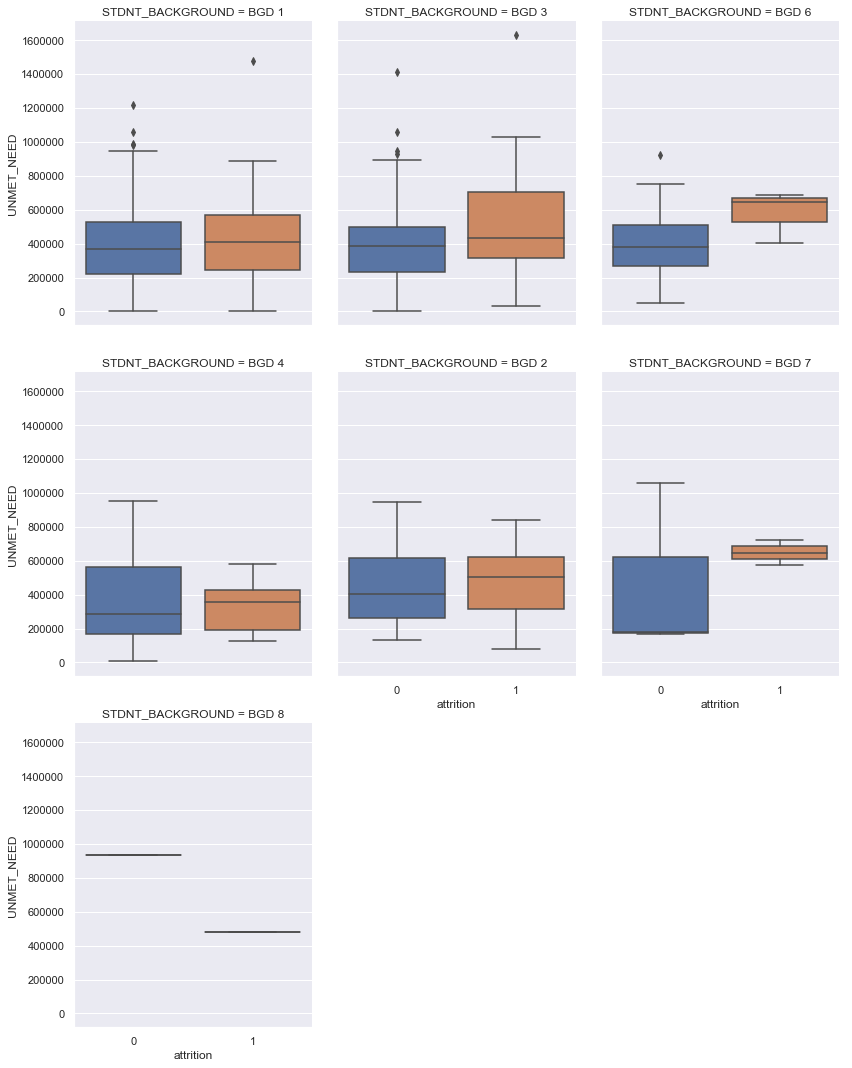

In [50]:
sns.catplot(col='STDNT_BACKGROUND',x='attrition',y='UNMET_NEED',kind='box',data=data.query("UNMET_NEED>0"),col_wrap=3,aspect=0.8)
plt.show()

In [51]:
data.groupby('STDNT_BACKGROUND',as_index=False)['EST_FAM_CONTRIBUTION'].agg({'EST_FAM_CONTRIBUTION':np.mean}).sort_values('EST_FAM_CONTRIBUTION',ascending=False)

,STDNT_BACKGROUND,EST_FAM_CONTRIBUTION
7,BGD 8,843864.000000
6,BGD 7,733316.842105
0,BGD 1,415604.783862
3,BGD 4,364611.366906
1,BGD 2,261131.886792
5,BGD 6,229103.617021
2,BGD 3,199163.189018
4,BGD 5,0.000000


In [52]:
def Change_BGD(x):
    if (x=='BGD 8'or x=='BGD 7' or x=='BGD 1'):
        return 'High'
    elif (x=='BGD 4' or x=='BGD 2' or x=='BGD 6'):
        return 'Medium'
    else:
        return 'Low'
    

In [53]:
data['STDNT_BGD_STATUS']=data['STDNT_BACKGROUND'].map(Change_BGD)

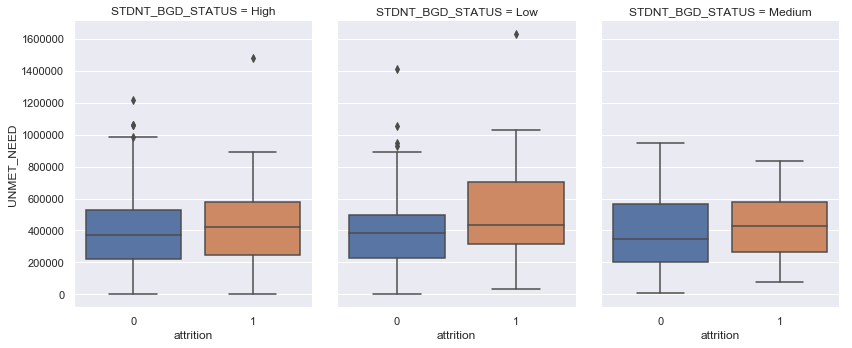

In [54]:
sns.catplot(col='STDNT_BGD_STATUS',x='attrition',y='UNMET_NEED',kind='box',data=data.query("UNMET_NEED>0"),aspect=0.8)

Text(0.5, 0, 'Local Student')

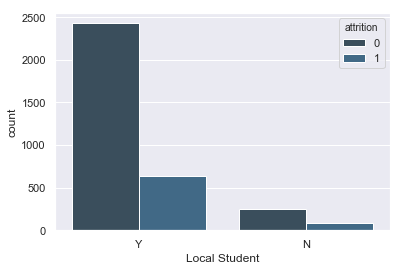

In [55]:
sns.countplot(x='IN_STATE_FLAG',hue='attrition',data=data,palette=(sns.color_palette('Blues_d',n_colors=5)))
plt.xlabel('Local Student')

In [56]:
temp=pd.crosstab(data['IN_STATE_FLAG'],data['attrition'])
print(temp)

attrition         0    1
IN_STATE_FLAG           
N               248   89
Y              2429  634


In [57]:
temp[1]/(temp[0]+temp[1]) *100

IN_STATE_FLAG
N    26.409496
Y    20.698661
dtype: float64

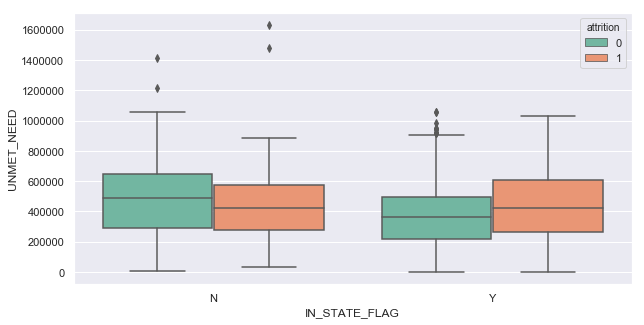

In [58]:
plt.figure(figsize=(10,5))
sns.boxplot(hue='attrition',y='UNMET_NEED',x='IN_STATE_FLAG',data=data.query("UNMET_NEED>0"),palette='Set2')

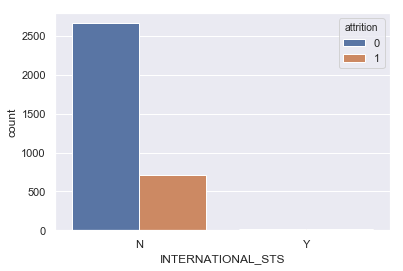

In [59]:
sns.countplot(x='INTERNATIONAL_STS',hue='attrition',data=data)


In [60]:
pd.crosstab(data['INTERNATIONAL_STS'],data['attrition'])

attrition,0,1
INTERNATIONAL_STS,,
N,2662,711
Y,15,12


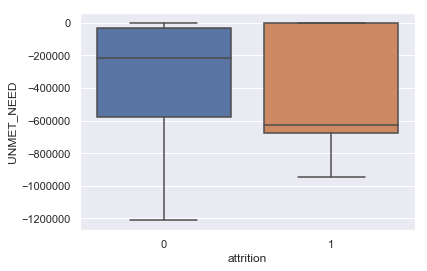

In [75]:
sns.boxplot(x='attrition',y='UNMET_NEED',data=data.query("INTERNATIONAL_STS=='Y'"))

In [76]:
temp=data.groupby('STDNT_MAJOR',as_index=False)[['attrition','STUDENT IDENTIFIER']].agg({'attrition':np.count_nonzero,'STUDENT IDENTIFIER':np.count_nonzero})#.sort_values('Percentage',ascending=False)
temp['Percentage']=temp['attrition']/temp['STUDENT IDENTIFIER'] *100
#sns.lineplot(x='STDNT_MAJOR',y='Percentage',data=temp)
temp.sort_values('Percentage',ascending=False)

,STDNT_MAJOR,attrition,STUDENT IDENTIFIER,Percentage
5,Biology and Secondary Ed,3,5,60.000000
14,Earth and Space Science,1,2,50.000000
38,Music,6,17,35.294118
9,Computer Science - Games,14,40,35.000000
19,Finance,8,24,33.333333
33,Management Information Systems,7,21,33.333333
29,Information Technology,3,10,30.000000
11,Criminal Justice,29,98,29.591837
46,Psychology,43,155,27.741935
45,Pre-Nursing,47,177,26.553672


In [77]:
data.STDNT_MAJOR.unique()

array(['Undeclared', 'Mathematics', 'Art', 'Political Science', 'Biology',
       'Accounting', 'Criminal Justice', 'Psychology', 'Theatre Arts',
       'Nursing', 'Pre-Nursing', 'Chemistry', 'Pre-Engineering/RETP',
       'Early Childhood Education', 'Music Performance',
       'English Language/Literature', 'Joint Enrollment - Accel',
       'History and Secondary Ed', 'History', 'Engineering Studies',
       'Computer Science - Systems', 'Pre-Business', 'Management',
       'Theatre Education', 'Marketing', 'Communication',
       'Music Education', 'French with Teacher Cert',
       'English and Secondary Ed', 'Exercise Science', 'General Business',
       'Mathematics and Secondary Ed', 'Finance', 'French',
       'Health Science', 'Spec Ed: Gen. Curr. - Reading', 'Music',
       'Middle Grades Education', 'Geology',
       'Management Information Systems', 'Art Education',
       'Applied Computer Science', 'Information Technology', 'Sociology',
       'Computer Science - Games',

In [78]:
Language=['Spanish with Teacher Cert','English Language/Literature','French with Teacher Cert','English and Secondary Ed','French','Spanish']
Engineering=['Computer Science - Games','Information Technology','Applied Computer Science','Management Information Systems','Mathematics','Pre-Engineering/RETP','Engineering Studies','Computer Science - Systems','Mathematics and Secondary Ed']
HealthScience=['Health and Physical Education','Biology','Psychology','Nursing','Pre-Nursing','Exercise Science','Health Science','Biology and Secondary Ed']
Business=['Accounting','Pre-Business','Management','Marketing','General Business','Finance']
Arts=['Liberal Arts','Art Education','Middle Grades Education','Art','Early Childhood Education','Music Performance','Joint Enrollment - Accel','Communication','Music Education','Spec Ed: Gen. Curr. - Reading','Music','Early Admission - Accel']
Science=['Chemistry','Geology','Sociology','Chemistry and Secondary Ed','Earth and Space Science']
Social=['Political Science','Criminal Justice','History and Secondary Ed','History','General Studies/AS']
Media=['Theatre Arts','Theatre Education']

In [79]:
def major_classification(x):
    if(x in Language):
        return('Language')
    elif(x in Engineering):
        return ('Engineering')
    elif (x in HealthScience ):
        return ('HealthScience')
    elif(x in Business):
        return('Business')
    elif (x in Arts):
        return('Arts')
    elif( x in Science):
        return ('Science')
    elif(x in Social):
        return('Social')
    elif(x in Media):
        return ('Media')
    else:
        return('Undeclared')
    




data['Major']=data['STDNT_MAJOR'].map(major_classification)


In [80]:
data[['STDNT_MAJOR','Major']]

,STDNT_MAJOR,Major
0,Undeclared,Undeclared
1,Undeclared,Undeclared
2,Mathematics,Engineering
3,Undeclared,Undeclared
4,Art,Arts
5,Political Science,Social
6,Biology,HealthScience
7,Biology,HealthScience
8,Accounting,Business
9,Undeclared,Undeclared


Text(0.5, 1.0, 'Student Major Subjects')

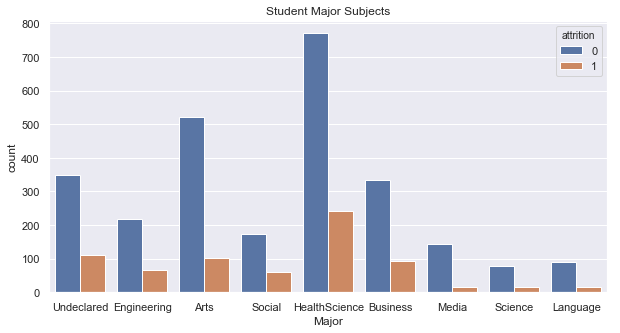

In [81]:
plt.figure(figsize=(10,5))
sns.countplot(x='Major',hue='attrition',data=data)
plt.title('Student Major Subjects')


Text(0.5, 0, 'Student Major')

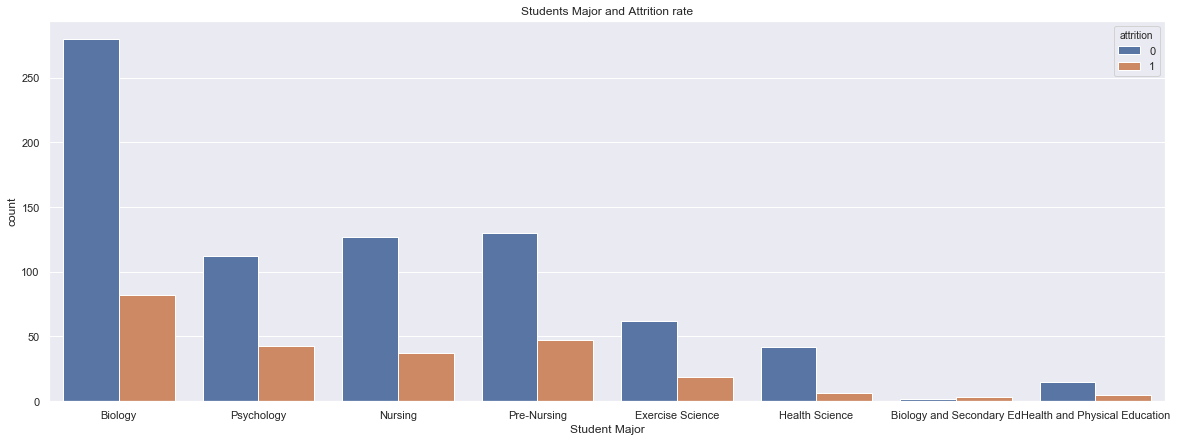

In [82]:
plt.figure(figsize=(20,7))
plt.title("Students Major and Attrition rate")
sns.countplot(x='STDNT_MAJOR',hue='attrition',data=data.query("Major=='HealthScience'"))
plt.xlabel('Student Major')

D:\ProgramFiles\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Entrance score vs attrition')

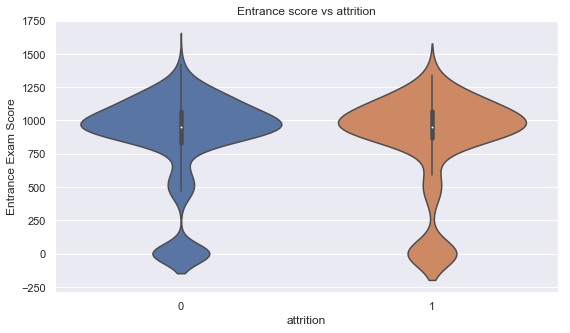

In [83]:
plt.figure(figsize=(9,5))
sns.violinplot(x='attrition',y='STDNT_TEST_ENTRANCE_COMB',data=data)
plt.ylabel('Entrance Exam Score')
plt.title('Entrance score vs attrition')

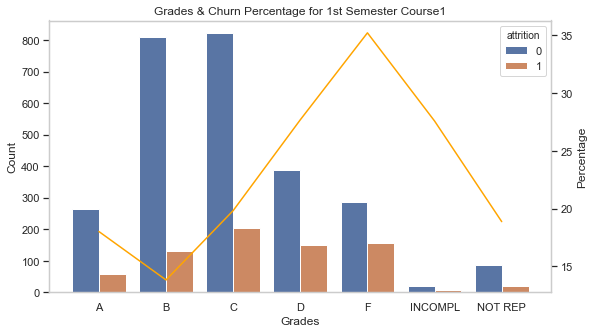

In [84]:
temp=data.groupby('CORE_COURSE_GRADE_1_F',as_index=False)[['attrition','STUDENT IDENTIFIER']].agg({'attrition':np.count_nonzero,'STUDENT IDENTIFIER':np.count_nonzero})#.sort_values('Percentage',ascending=False)
temp['Percentage']=temp['attrition']/temp['STUDENT IDENTIFIER'] *100
temp.sort_values('Percentage',ascending=False)
data1=data.groupby(['CORE_COURSE_GRADE_1_F','attrition'],as_index=False).agg({'STUDENT IDENTIFIER':np.count_nonzero})


sns.set(style='whitegrid')
plt.figure(figsize=(9,5))
g1=sns.barplot(x='CORE_COURSE_GRADE_1_F',y='STUDENT IDENTIFIER',hue='attrition',data=data1)
plt.ylabel('Count')
plt.xlabel('Grades')
ax2=plt.twinx()
g2=sns.lineplot(x='CORE_COURSE_GRADE_1_F',y='Percentage',data=temp,ax=ax2,color='orange',dashes=True)
g1.grid(False)
g2.grid(False)


plt.title('Grades & Churn Percentage for 1st Semester Course1')

plt.show()

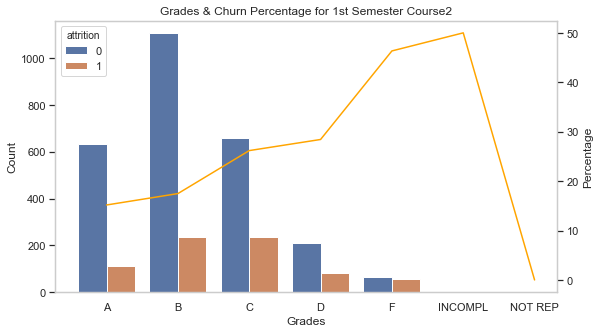

In [85]:
#preparing the data to plot
temp=data.groupby('CORE_COURSE_GRADE_2_F',as_index=False)[['attrition','STUDENT IDENTIFIER']].agg({'attrition':np.count_nonzero,'STUDENT IDENTIFIER':np.count_nonzero})#.sort_values('Percentage',ascending=False)
temp['Percentage']=temp['attrition']/temp['STUDENT IDENTIFIER'] *100
temp.sort_values('Percentage',ascending=False)

data1=data.groupby(['CORE_COURSE_GRADE_2_F','attrition'],as_index=False).agg({'STUDENT IDENTIFIER':np.count_nonzero})
#plotting the data
sns.set(style='whitegrid')
plt.figure(figsize=(9,5))
g1=sns.barplot(x='CORE_COURSE_GRADE_2_F',y='STUDENT IDENTIFIER',hue='attrition',data=data1)
plt.ylabel('Count')
plt.xlabel('Grades')
ax2=plt.twinx()
g2=sns.lineplot(x='CORE_COURSE_GRADE_2_F',y='Percentage',data=temp,ax=ax2,color='orange',dashes=True)
g1.grid(False)
g2.grid(False)


plt.title('Grades & Churn Percentage for 1st Semester Course2')
plt.show()


In [86]:
pd.crosstab(data['CORE_COURSE_GRADE_1_F'],data['CORE_COURSE_GRADE_2_F'])

CORE_COURSE_GRADE_2_F,A,B,C,D,F,INCOMPL,NOT REP
CORE_COURSE_GRADE_1_F,,,,,,,
A,287,0,35,0,0,0,0
B,344,571,26,0,0,0,0
C,84,569,371,0,0,0,0
D,11,119,283,125,0,0,0
F,8,36,139,148,109,0,0
INCOMPL,5,10,5,2,3,4,0
NOT REP,6,34,35,17,11,0,3


In [87]:
pd.crosstab(data['CORE_COURSE_GRADE_1_F'],data['CORE_COURSE_GRADE_1_S'])

CORE_COURSE_GRADE_1_S,A,B,C,D,F,INCOMPL,NOT REP
CORE_COURSE_GRADE_1_F,,,,,,,
A,147,101,61,7,4,1,1
B,139,363,297,88,38,6,10
C,51,277,372,173,125,7,19
D,10,90,201,116,108,4,9
F,10,26,162,102,130,5,5
INCOMPL,1,5,10,5,5,1,2
NOT REP,8,34,40,10,11,2,1


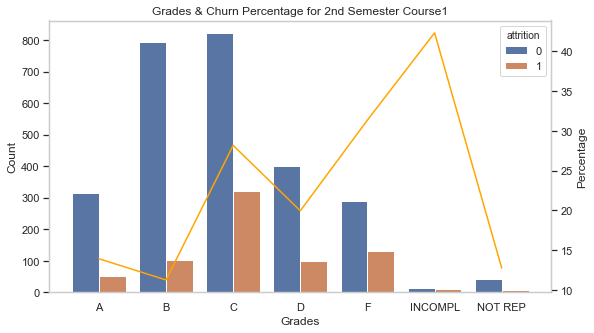

In [88]:
temp=data.groupby('CORE_COURSE_GRADE_1_S',as_index=False)[['attrition','STUDENT IDENTIFIER']].agg({'attrition':np.count_nonzero,'STUDENT IDENTIFIER':np.count_nonzero})#.sort_values('Percentage',ascending=False)
temp['Percentage']=temp['attrition']/temp['STUDENT IDENTIFIER'] *100
temp.sort_values('Percentage',ascending=False)

data1=data.groupby(['CORE_COURSE_GRADE_1_S','attrition'],as_index=False).agg({'STUDENT IDENTIFIER':np.count_nonzero})
#plotting the data
sns.set(style='whitegrid')
plt.figure(figsize=(9,5))
g1=sns.barplot(x='CORE_COURSE_GRADE_1_S',y='STUDENT IDENTIFIER',hue='attrition',data=data1)
plt.ylabel('Count')
plt.xlabel('Grades')
ax2=plt.twinx()
g2=sns.lineplot(x='CORE_COURSE_GRADE_1_S',y='Percentage',data=temp,ax=ax2,color='orange',dashes=True)
g1.grid(False)
g2.grid(False)


plt.title('Grades & Churn Percentage for 2nd Semester Course1')
plt.show()

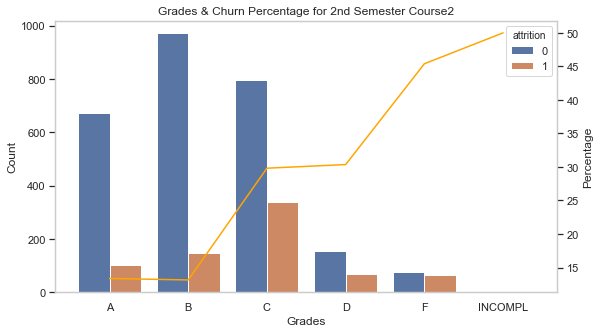

In [89]:
temp=data.groupby('CORE_COURSE_GRADE_2_S',as_index=False)[['attrition','STUDENT IDENTIFIER']].agg({'attrition':np.count_nonzero,'STUDENT IDENTIFIER':np.count_nonzero})#.sort_values('Percentage',ascending=False)
temp['Percentage']=temp['attrition']/temp['STUDENT IDENTIFIER'] *100
temp.sort_values('Percentage',ascending=False)

data1=data.groupby(['CORE_COURSE_GRADE_2_S','attrition'],as_index=False).agg({'STUDENT IDENTIFIER':np.count_nonzero})
#plotting the data
sns.set(style='whitegrid')
plt.figure(figsize=(9,5))
g1=sns.barplot(x='CORE_COURSE_GRADE_2_S',y='STUDENT IDENTIFIER',hue='attrition',data=data1)
plt.ylabel('Count')
plt.xlabel('Grades')
ax2=plt.twinx()
g2=sns.lineplot(x='CORE_COURSE_GRADE_2_S',y='Percentage',data=temp,ax=ax2,color='orange',dashes=True)
g1.grid(False)
g2.grid(False)


plt.title('Grades & Churn Percentage for 2nd Semester Course2')
plt.show()

Text(0, 0.5, 'Distance From Home')

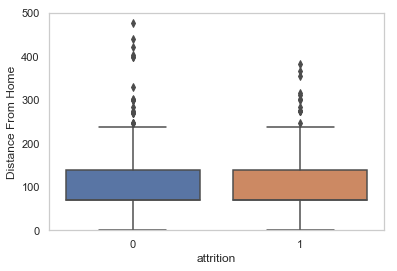

In [90]:
sns.boxplot(x='attrition',y='DISTANCE_FROM_HOME',data=data).grid(False)
plt.ylim(0,500)
plt.ylabel('Distance From Home')

(0, 500)

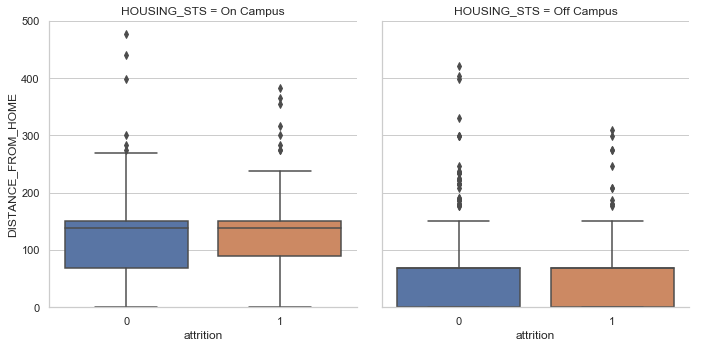

In [91]:
sns.catplot(col='HOUSING_STS',x='attrition',y='DISTANCE_FROM_HOME',kind='box',data=data)
plt.ylim(0,500)

Text(0.5, 1.0, 'HIGH SCHooL GPA')

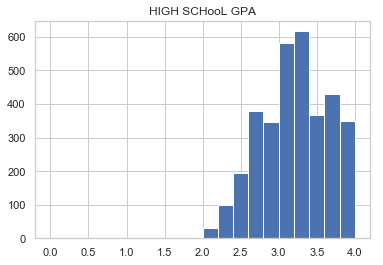

In [92]:
plt.hist(x=data.HIGH_SCHL_GPA,bins=20)
plt.title('HIGH SCHooL GPA')

(1, 5)

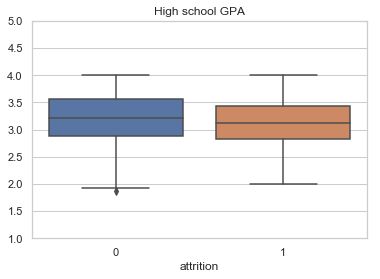

In [93]:
sns.boxplot(y='HIGH_SCHL_GPA',x='attrition',data=data) 
plt.title('High school GPA')
plt.ylabel('')
plt.ylim(1,5)

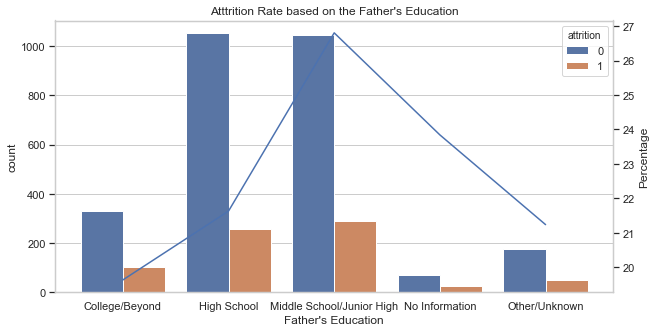

In [94]:
plt.figure(figsize=(10,5))
sns.countplot(x='FATHER_HI_EDU_DESC',hue='attrition',data=data)
plt.xlabel("Father's Education" )
ax2=plt.twinx()
temp=data.groupby('FATHER_HI_EDU_DESC',as_index=False)[['attrition','STUDENT IDENTIFIER']].agg({'attrition':np.count_nonzero,'STUDENT IDENTIFIER':np.count_nonzero})#.sort_values('Percentage',ascending=False)
temp['Percentage']=temp['attrition']/temp['STUDENT IDENTIFIER'] *100
ax=sns.lineplot(x='FATHER_HI_EDU_DESC',y='Percentage',data=temp)
plt.title("Atttrition Rate based on the Father's Education")

ax.grid(False)


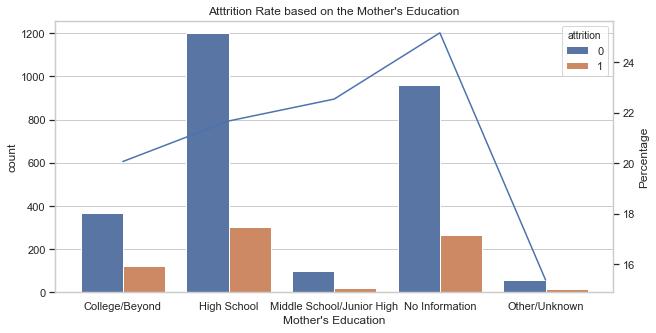

In [95]:
plt.figure(figsize=(10,5))
sns.countplot(x='MOTHER_HI_EDU_DESC',hue='attrition',data=data)
plt.xlabel("Mother's Education" )
ax2=plt.twinx()
temp=data.groupby('MOTHER_HI_EDU_DESC',as_index=False)[['attrition','STUDENT IDENTIFIER']].agg({'attrition':np.count_nonzero,'STUDENT IDENTIFIER':np.count_nonzero})#.sort_values('Percentage',ascending=False)
temp['Percentage']=temp['attrition']/temp['STUDENT IDENTIFIER'] *100
ax=sns.lineplot(x='MOTHER_HI_EDU_DESC',y='Percentage',data=temp)
plt.title("Atttrition Rate based on the Mother's Education")
ax.grid(False)


Text(0.5, 1.0, 'DEGREE vs CHURN')

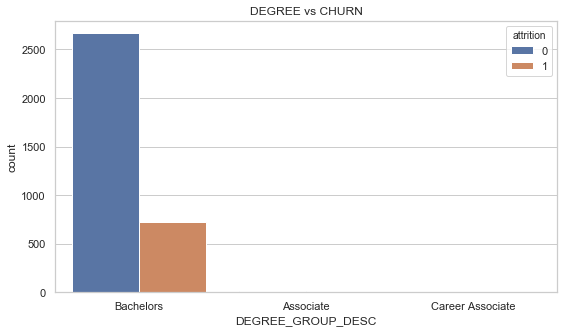

In [96]:
plt.figure(figsize=(9,5))
sns.countplot(x='DEGREE_GROUP_DESC',hue='attrition',data=data)
plt.title('DEGREE vs CHURN')

In [97]:
data['First_Diff']=data['FIRST_TERM_ATTEMPT_HRS']-data['FIRST_TERM_EARNED_HRS']
data['Sec_Diff']=data['SECOND_TERM_ATTEMPT_HRS']-data['SECOND_TERM_EARNED_HRS']


(0, 400)

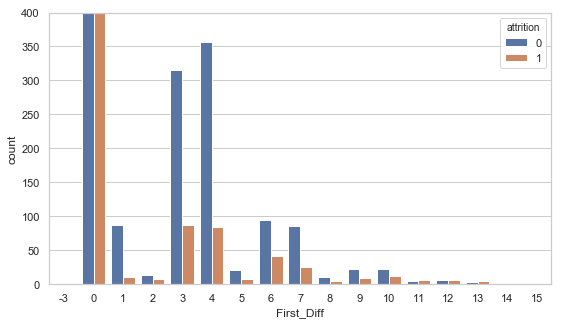

In [98]:
plt.figure(figsize=(9,5))
sns.countplot(x='First_Diff',hue='attrition',data=data)
plt.ylim(0,400)

(0, 300)

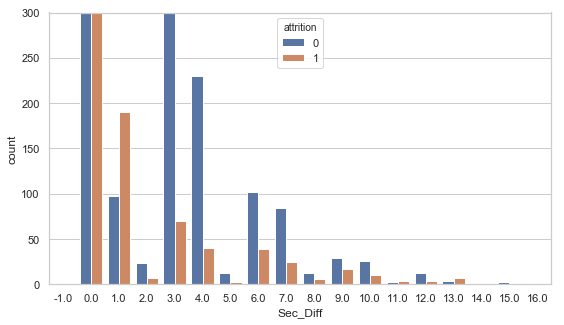

In [99]:
plt.figure(figsize=(9,5))
sns.countplot(x='Sec_Diff',hue='attrition',data=data)
plt.ylim(0,300)

In [100]:
def DifferenceBreak(x):
    if (x <0):
        return 'nil'
    elif (0<=x and x<=4):
        return 'Low'
    elif(x>4 and x<=8):
        return 'Medium'
    elif(x>8):
        return 'High'

In [101]:
data['First_Diff_Lab']=data['First_Diff'].map(DifferenceBreak)
data['Sec_Diff_Lab']=data['Sec_Diff'].map(DifferenceBreak)

Text(0.5, 0, 'Difference between the Attempted hrs and Gained hrs')

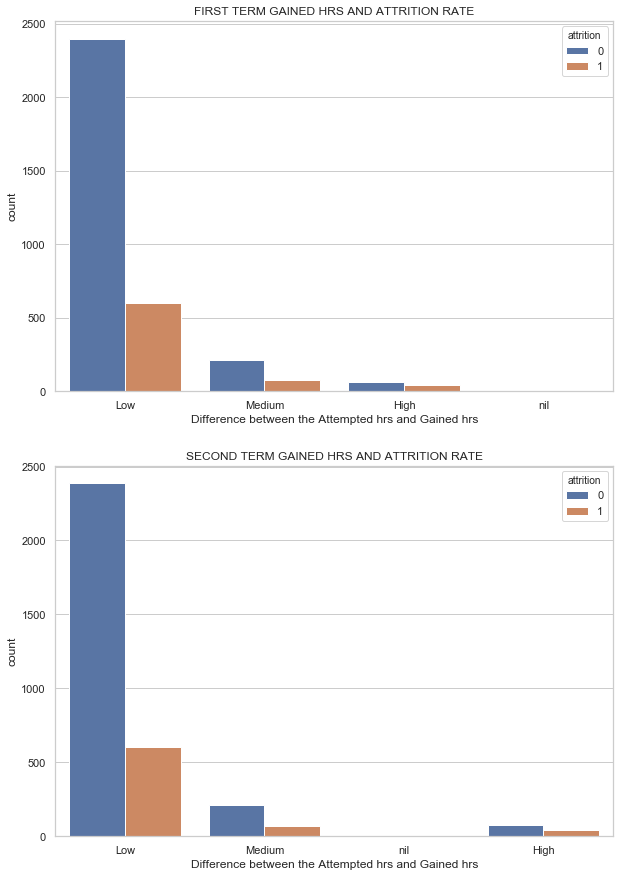

In [102]:
plt.figure(figsize=(10,15))
plt.subplot(2,1,1,)

plt.title('FIRST TERM GAINED HRS AND ATTRITION RATE')
sns.countplot(x='First_Diff_Lab',hue='attrition',data=data)
plt.xlabel('Difference between the Attempted hrs and Gained hrs')


plt.subplot(2,1,2)
plt.title('SECOND TERM GAINED HRS AND ATTRITION RATE')
sns.countplot(x='Sec_Diff_Lab',hue='attrition',data=data)
plt.xlabel('Difference between the Attempted hrs and Gained hrs')

Text(0, 0.5, '')

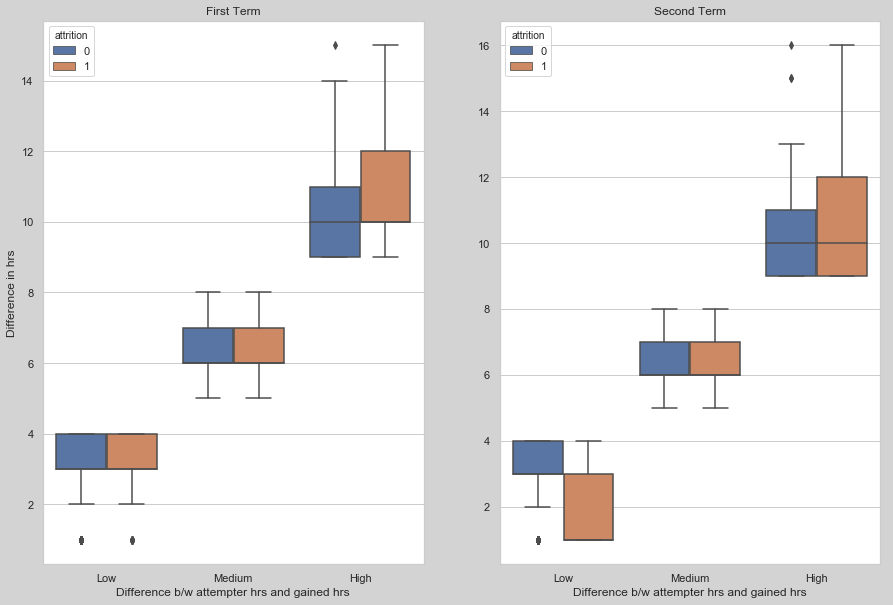

In [103]:
plt.figure(figsize=(15,10),facecolor='lightgrey')
plt.subplot(1,2,1)
plt.title('First Term')
sns.boxplot(x='First_Diff_Lab',y='First_Diff',hue='attrition',data=data.query("First_Diff>0"))
plt.xlabel('Difference b/w attempter hrs and gained hrs')
plt.ylabel('Difference in hrs')
plt.subplot(1,2,2)
plt.title('Second Term')
sns.boxplot(x='Sec_Diff_Lab',y='Sec_Diff',hue='attrition',data=data.query("Sec_Diff>0"))
plt.xlabel('Difference b/w attempter hrs and gained hrs')
plt.ylabel('')

# KEY OBSERVATIONS SUMMARY


# MODEL CREATION

In [104]:
data.columns

Index(['STUDENT IDENTIFIER', 'STDNT_AGE', 'STDNT_GENDER', 'STDNT_BACKGROUND',
       'IN_STATE_FLAG', 'INTERNATIONAL_STS', 'STDNT_MAJOR', 'STDNT_MINOR',
       'STDNT_TEST_ENTRANCE_COMB', 'FIRST_TERM', 'CORE_COURSE_NAME_1_F',
       'CORE_COURSE_GRADE_1_F', 'CORE_COURSE_NAME_2_F',
       'CORE_COURSE_GRADE_2_F', 'SECOND_TERM', 'CORE_COURSE_NAME_1_S',
       'CORE_COURSE_GRADE_1_S', 'CORE_COURSE_NAME_2_S',
       'CORE_COURSE_GRADE_2_S', 'HOUSING_STS', 'RETURNED_2ND_YR',
       'DISTANCE_FROM_HOME', 'HIGH_SCHL_GPA', 'HIGH_SCHL_NAME',
       'FATHER_HI_EDU_CD', 'FATHER_HI_EDU_DESC', 'MOTHER_HI_EDU_CD',
       'MOTHER_HI_EDU_DESC', 'DEGREE_GROUP_CD', 'DEGREE_GROUP_DESC',
       'FIRST_TERM_ATTEMPT_HRS', 'FIRST_TERM_EARNED_HRS',
       'SECOND_TERM_ATTEMPT_HRS', 'SECOND_TERM_EARNED_HRS', 'GROSS_FIN_NEED',
       'COST_OF_ATTEND', 'EST_FAM_CONTRIBUTION', 'UNMET_NEED', 'attrition',
       'STDNT_BGD_STATUS', 'Major', 'First_Diff', 'Sec_Diff', 'First_Diff_Lab',
       'Sec_Diff_Lab'],
      d

In [105]:
X=data.drop(columns=['STUDENT IDENTIFIER','STDNT_BACKGROUND','STDNT_MAJOR','STDNT_MINOR','FIRST_TERM','SECOND_TERM',
                   'RETURNED_2ND_YR','HIGH_SCHL_NAME','FATHER_HI_EDU_DESC','MOTHER_HI_EDU_DESC','DEGREE_GROUP_DESC',
                    'SECOND_TERM_ATTEMPT_HRS','SECOND_TERM_EARNED_HRS','FIRST_TERM_ATTEMPT_HRS','FIRST_TERM_EARNED_HRS',
                   'attrition','First_Diff','Sec_Diff','CORE_COURSE_NAME_1_F','CORE_COURSE_NAME_2_F','CORE_COURSE_NAME_1_S',
                     'CORE_COURSE_NAME_2_S'])#,,,])
y=data['attrition']

In [106]:
X.head()

,STDNT_AGE,STDNT_GENDER,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_TEST_ENTRANCE_COMB,CORE_COURSE_GRADE_1_F,CORE_COURSE_GRADE_2_F,CORE_COURSE_GRADE_1_S,CORE_COURSE_GRADE_2_S,HOUSING_STS,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_CD,MOTHER_HI_EDU_CD,DEGREE_GROUP_CD,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,STDNT_BGD_STATUS,Major,First_Diff_Lab,Sec_Diff_Lab
0,18,F,Y,N,1150.0,A,A,A,A,On Campus,150.0,4.00,0.0,0.0,B,0,0,0,0.0,High,Undeclared,Low,Low
1,19,F,N,N,1190.0,A,A,A,A,Off Campus,69.0,2.89,3.0,3.0,B,570000,1355760,785760,459300.0,High,Undeclared,Low,Low
2,18,M,Y,N,1030.0,A,A,A,A,On Campus,150.0,3.39,2.0,4.0,B,0,0,0,0.0,High,Engineering,Low,Low
3,18,M,Y,N,1220.0,A,A,A,A,On Campus,150.0,2.93,3.0,3.0,B,0,0,0,0.0,High,Undeclared,Low,Low
4,18,F,Y,N,1190.0,A,A,A,A,Off Campus,69.0,3.86,3.0,2.0,B,835920,1355760,519840,278340.0,High,Arts,Low,Low


In [107]:
X=pd.get_dummies(X)

In [108]:
X.head()

,STDNT_AGE,STDNT_TEST_ENTRANCE_COMB,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_CD,MOTHER_HI_EDU_CD,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,STDNT_GENDER_F,STDNT_GENDER_M,IN_STATE_FLAG_N,IN_STATE_FLAG_Y,INTERNATIONAL_STS_N,INTERNATIONAL_STS_Y,CORE_COURSE_GRADE_1_F_A,CORE_COURSE_GRADE_1_F_B,CORE_COURSE_GRADE_1_F_C,CORE_COURSE_GRADE_1_F_D,CORE_COURSE_GRADE_1_F_F,CORE_COURSE_GRADE_1_F_INCOMPL,CORE_COURSE_GRADE_1_F_NOT REP,CORE_COURSE_GRADE_2_F_A,CORE_COURSE_GRADE_2_F_B,CORE_COURSE_GRADE_2_F_C,CORE_COURSE_GRADE_2_F_D,CORE_COURSE_GRADE_2_F_F,CORE_COURSE_GRADE_2_F_INCOMPL,CORE_COURSE_GRADE_2_F_NOT REP,CORE_COURSE_GRADE_1_S_A,CORE_COURSE_GRADE_1_S_B,CORE_COURSE_GRADE_1_S_C,CORE_COURSE_GRADE_1_S_D,CORE_COURSE_GRADE_1_S_F,CORE_COURSE_GRADE_1_S_INCOMPL,CORE_COURSE_GRADE_1_S_NOT REP,CORE_COURSE_GRADE_2_S_A,CORE_COURSE_GRADE_2_S_B,CORE_COURSE_GRADE_2_S_C,CORE_COURSE_GRADE_2_S_D,CORE_COURSE_GRADE_2_S_F,CORE_COURSE_GRADE_2_S_INCOMPL,HOUSING_STS_Off Campus,HOUSING_STS_On Campus,DEGREE_GROUP_CD_A,DEGREE_GROUP_CD_B,DEGREE_GROUP_CD_V,STDNT_BGD_STATUS_High,STDNT_BGD_STATUS_Low,STDNT_BGD_STATUS_Medium,Major_Arts,Major_Business,Major_Engineering,Major_HealthScience,Major_Language,Major_Media,Major_Science,Major_Social,Major_Undeclared,First_Diff_Lab_High,First_Diff_Lab_Low,First_Diff_Lab_Medium,First_Diff_Lab_nil,Sec_Diff_Lab_High,Sec_Diff_Lab_Low,Sec_Diff_Lab_Medium,Sec_Diff_Lab_nil
0,18,1150.0,150.0,4.00,0.0,0.0,0,0,0,0.0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
1,19,1190.0,69.0,2.89,3.0,3.0,570000,1355760,785760,459300.0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
2,18,1030.0,150.0,3.39,2.0,4.0,0,0,0,0.0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,18,1220.0,150.0,2.93,3.0,3.0,0,0,0,0.0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
4,18,1190.0,69.0,3.86,3.0,2.0,835920,1355760,519840,278340.0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=400)

In [136]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score

In [117]:
clf1=GradientBoostingClassifier(n_estimators=80,random_state=400,max_depth=3)

In [118]:
clf1.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              n_iter_no_change=None, presort='auto', random_state=400,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [119]:
clf1.score(X_test,y_test)

0.7808823529411765

In [120]:
y_pred=clf1.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       532
           1       0.49      0.14      0.21       148

   micro avg       0.78      0.78      0.78       680
   macro avg       0.64      0.55      0.54       680
weighted avg       0.73      0.78      0.73       680



In [144]:
from sklearn.model_selection import GridSearchCV

In [222]:
#mod=GridSearchCV(clf,param_grid={'n_estimators':[60,80,100,120,140,160],'max_depth':[3,4,5]})
#mod.fit(X_train,y_train)
print('Over')

D:\ProgramFiles\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Over


In [250]:
#mod.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              n_iter_no_change=None, presort='auto', random_state=400,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [121]:
feature_imp=pd.Series(clf1.feature_importances_,index=X.columns)
feature_imp.sort_values(ascending=False)

UNMET_NEED                       0.121355
CORE_COURSE_GRADE_1_S_C          0.090727
DISTANCE_FROM_HOME               0.079595
CORE_COURSE_GRADE_2_S_C          0.069777
CORE_COURSE_GRADE_2_S_F          0.059538
COST_OF_ATTEND                   0.046941
HIGH_SCHL_GPA                    0.043022
CORE_COURSE_GRADE_1_S_B          0.031503
STDNT_TEST_ENTRANCE_COMB         0.031022
STDNT_BGD_STATUS_High            0.029746
GROSS_FIN_NEED                   0.029737
CORE_COURSE_GRADE_1_F_F          0.028055
CORE_COURSE_GRADE_2_S_B          0.025661
EST_FAM_CONTRIBUTION             0.019151
MOTHER_HI_EDU_CD                 0.017742
STDNT_AGE                        0.016678
Major_Media                      0.015701
Major_HealthScience              0.015435
CORE_COURSE_GRADE_1_F_B          0.015349
CORE_COURSE_GRADE_1_S_F          0.015082
First_Diff_Lab_Low               0.014685
Major_Arts                       0.014533
CORE_COURSE_GRADE_1_S_INCOMPL    0.013885
STDNT_GENDER_F                   0

In [164]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [159]:
clf2=RandomForestClassifier(n_estimators=80,oob_score=True,random_state=400,criterion='gini')

In [160]:
clf2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
            oob_score=True, random_state=400, verbose=0, warm_start=False)

In [161]:
clf2.oob_score_

0.794485294117647

In [162]:
clf2.score(X_test,y_test)

0.7838235294117647

In [163]:
y_pred=clf2.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88       532
           1       0.52      0.11      0.18       148

   micro avg       0.78      0.78      0.78       680
   macro avg       0.66      0.54      0.53       680
weighted avg       0.74      0.78      0.72       680



In [128]:
from sklearn.linear_model import LogisticRegression

In [129]:
clf3=LogisticRegression()

In [130]:
clf3.fit(X_train,y_train)

D:\ProgramFiles\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [132]:
clf3.score(X_test,y_test)

0.75

In [133]:
y_pred=clf3.predict(X_test)

In [377]:
#y_pred=X_test['y_prob'].map(lambda x: 1 if x >0.6 else 0)

In [134]:
confusion_matrix(y_test,y_pred)

array([[502,  30],
       [140,   8]], dtype=int64)

In [137]:
f1_score(y_test,y_pred)

0.08602150537634409

In [138]:
accuracy_score(y_test,y_pred)

0.75

In [140]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.86       532
           1       0.21      0.05      0.09       148

   micro avg       0.75      0.75      0.75       680
   macro avg       0.50      0.50      0.47       680
weighted avg       0.66      0.75      0.69       680



In [165]:
clf4=GradientBoostingClassifier()

In [ ]:
#mod=GridSearchCV(clf4,param_grid={'n_estimators':[60,80,100,120,140,160],'max_depth':[3,4,5]})
#mod.fit(X_train,y_train)
#print('Over')

In [166]:
clf4.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [177]:
clf4.score(X_test,y_test)

0.7794117647058824

In [178]:
#mod.score(X_test,y_test)
y_pred=clf4.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       532
           1       0.48      0.14      0.22       148

   micro avg       0.78      0.78      0.78       680
   macro avg       0.64      0.55      0.55       680
weighted avg       0.73      0.78      0.73       680



    Based on the metrix above classifier 2 and classifier seems to be a better models based on the f1 score we can choose RandomForestClassifier as the model to predict the students who might leave the institution.